# Strava Analysis and Data Visualization

## 1. Setup & Data Pipeline

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [4]:
# Database connection parameters
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'strava'
DB_USER = 'postgres'
DB_PASSWORD = 'root'  # Replace with your actual PostgreSQL password

# Create database connection string
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

try:
    # Create SQLAlchemy engine
    engine = create_engine(connection_string)
    
    # Test connection
    test_query = "SELECT version();"
    result = pd.read_sql(test_query, engine)
    
    print("Database connection successful!")
    print(f"Connected to: {DB_NAME} database")
    print(f"PostgreSQL Version: {result.iloc[0,0][:50]}...")
    
except Exception as e:
    print(f"Connection failed: {e}")

Database connection successful!
Connected to: strava database
PostgreSQL Version: PostgreSQL 17.5 on x86_64-windows, compiled by msv...


In [5]:
# Define tables to import (8 key tables for our analysis)
tables_to_import = [
    'daily_activity',
    'hourly_calories', 
    'hourly_steps',
    'sleep_day',
    'weight_log_info',
    'daily_calories',
    'daily_steps',
    'heartrate_seconds'
]

# Dictionary to store all dataframes
dataframes = {}

# Import each table
for table in tables_to_import:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, engine)
    dataframes[table] = df
    print(f"{table}: {df.shape[0]} rows, {df.shape[1]} columns")

print(f"\nSuccessfully imported {len(dataframes)} datasets")

daily_activity: 940 rows, 15 columns
hourly_calories: 22099 rows, 3 columns
hourly_steps: 22099 rows, 3 columns
sleep_day: 410 rows, 6 columns
weight_log_info: 67 rows, 8 columns
daily_calories: 940 rows, 3 columns
daily_steps: 940 rows, 3 columns
heartrate_seconds: 2483658 rows, 3 columns

Successfully imported 8 datasets


In [6]:
# # Get all table from the database
# query = """
# SELECT 
#     table_name 
# FROM 
#     information_schema.tables 
# WHERE 
#     table_schema = 'public'
# """

# # Get list of all tables
# all_tables = pd.read_sql(query, engine)
# table_list = all_tables['table_name'].tolist()

# print(f"Found {len(table_list)} tables in database:")
# for table in table_list:
#     print(f"- {table}")

# # Dictionary to store all dataframes
# dataframes = {}

# # Import all tables automatically
# for table in table_list:
#     query = f"SELECT * FROM {table}"
#     df = pd.read_sql(query, engine)
#     dataframes[table] = df
#     print(f"{table}: {df.shape[0]} rows, {df.shape[1]} columns")

# print(f"\nImported all {len(dataframes)} datasets successfully!")

## 2. Data Validation

In [7]:
# 1. daily_activity:
daily_activity = pd.read_sql("SELECT * FROM daily_activity", engine)
daily_activity

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.11,8.11,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.25,18.25,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.15,8.15,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.56,19.56,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [8]:
daily_activity.shape

(940, 15)

In [9]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          940 non-null    int64  
 1   activity_date               940 non-null    object 
 2   total_steps                 940 non-null    int64  
 3   total_distance              940 non-null    float64
 4   tracker_distance            940 non-null    float64
 5   logged_activities_distance  940 non-null    float64
 6   very_active_distance        940 non-null    float64
 7   moderately_active_distance  940 non-null    float64
 8   light_active_distance       940 non-null    float64
 9   sedentary_active_distance   940 non-null    float64
 10  very_active_minutes         940 non-null    int64  
 11  fairly_active_minutes       940 non-null    int64  
 12  lightly_active_minutes      940 non-null    int64  
 13  sedentary_minutes           940 non

In [10]:
daily_activity.describe()

,id,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108128,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619725,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030000,28.030000,4.940000,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [11]:
# 2. hourly_calories
hourly_calories = pd.read_sql("SELECT * FROM hourly_calories", engine)
hourly_calories

,id,activity_hour,calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48
...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126
22095,8877689391,2016-05-12 11:00:00,192
22096,8877689391,2016-05-12 12:00:00,321
22097,8877689391,2016-05-12 13:00:00,101


In [12]:
hourly_calories.shape

(22099, 3)

In [13]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             22099 non-null  int64         
 1   activity_hour  22099 non-null  datetime64[ns]
 2   calories       22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [14]:
hourly_calories.describe()

,id,activity_hour,calories
count,2.209900e+04,22099,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,97.386760
min,1.503960e+09,2016-04-12 00:00:00,42.000000
25%,2.320127e+09,2016-04-19 01:00:00,63.000000
50%,4.445115e+09,2016-04-26 06:00:00,83.000000
75%,6.962181e+09,2016-05-03 19:00:00,108.000000
max,8.877689e+09,2016-05-12 15:00:00,948.000000
std,2.422500e+09,NaN,60.702622


In [15]:
# 3. hourly_steps:
hourly_steps = pd.read_sql("SELECT * FROM hourly_steps", engine)
hourly_steps

,id,activity_hour,step_total
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0
...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514
22095,8877689391,2016-05-12 11:00:00,1407
22096,8877689391,2016-05-12 12:00:00,3135
22097,8877689391,2016-05-12 13:00:00,307


In [16]:
hourly_steps.shape

(22099, 3)

In [17]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             22099 non-null  int64         
 1   activity_hour  22099 non-null  datetime64[ns]
 2   step_total     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [18]:
hourly_steps.describe()

,id,activity_hour,step_total
count,2.209900e+04,22099,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,320.166342
min,1.503960e+09,2016-04-12 00:00:00,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000
50%,4.445115e+09,2016-04-26 06:00:00,40.000000
75%,6.962181e+09,2016-05-03 19:00:00,357.000000
max,8.877689e+09,2016-05-12 15:00:00,10554.000000
std,2.422500e+09,NaN,690.384228


In [19]:
# 4. sleep_day:
sleep_day = pd.read_sql("SELECT * FROM sleep_day", engine)
sleep_day

,row_id,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1,1503960366,2016-04-12,1,327,346
1,2,1503960366,2016-04-13,2,384,407
2,3,1503960366,2016-04-15,1,412,442
3,4,1503960366,2016-04-16,2,340,367
4,5,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...,...
405,409,8792009665,2016-04-30,1,343,360
406,410,8792009665,2016-05-01,1,503,527
407,411,8792009665,2016-05-02,1,415,423
408,412,8792009665,2016-05-03,1,516,545


In [20]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                410 non-null    int64 
 1   id                    410 non-null    int64 
 2   sleep_day             410 non-null    object
 3   total_sleep_records   410 non-null    int64 
 4   total_minutes_asleep  410 non-null    int64 
 5   total_time_in_bed     410 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.3+ KB


In [21]:
sleep_day.describe()

,row_id,id,total_sleep_records,total_minutes_asleep,total_time_in_bed
count,410.000000,4.100000e+02,410.000000,410.000000,410.000000
mean,206.643902,4.994963e+09,1.119512,419.173171,458.482927
std,119.470511,2.060863e+09,0.346636,118.635918,127.455140
min,1.000000,1.503960e+09,1.000000,58.000000,61.000000
25%,103.250000,3.977334e+09,1.000000,361.000000,403.750000
50%,206.500000,4.702922e+09,1.000000,432.500000,463.000000
75%,309.750000,6.962181e+09,1.000000,490.000000,526.000000
max,413.000000,8.792010e+09,3.000000,796.000000,961.000000


In [22]:
# unique users:
sleep_day['id'].nunique()

24

In [23]:
# 5. weight_log_info:
weight_log_info = pd.read_sql('SELECT * FROM weight_log_info', engine)
weight_log_info.head()

,id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,logid
0,1503960366,2016-05-02 23:59:59,52.6,115.96,22.0,22.65,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.6,115.96,NaN,22.65,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.5,294.32,NaN,47.54,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.7,125.00,NaN,21.45,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.3,126.32,NaN,21.69,True,1463097599000


In [24]:
weight_log_info.shape

(67, 8)

In [25]:
weight_log_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                67 non-null     int64         
 1   date              67 non-null     datetime64[ns]
 2   weight_kg         67 non-null     float64       
 3   weight_pounds     67 non-null     float64       
 4   fat               2 non-null      float64       
 5   bmi               67 non-null     float64       
 6   is_manual_report  67 non-null     bool          
 7   logid             67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [26]:
weight_log_info.describe()

,id,date,weight_kg,weight_pounds,fat,bmi,logid
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,2016-04-27 15:39:54.283582208,72.035821,158.810746,23.50000,25.185224,1.461772e+12
min,1.503960e+09,2016-04-12 06:47:11,52.600000,115.960000,22.00000,21.450000,1.460444e+12
25%,6.962181e+09,2016-04-19 15:19:45,61.400000,135.360000,22.75000,23.960000,1.461079e+12
50%,6.962181e+09,2016-04-27 23:59:59,62.500000,137.790000,23.50000,24.390000,1.461802e+12
75%,8.877689e+09,2016-05-04 15:24:10.500000,85.050000,187.500000,24.25000,25.560000,1.462375e+12
max,8.877689e+09,2016-05-12 23:59:59,133.500000,294.320000,25.00000,47.540000,1.463098e+12
std,1.950322e+09,NaN,13.923206,30.695989,2.12132,3.066962,7.829948e+08


In [27]:
weight_log_info['id'].nunique()

8

In [28]:
# 6. daily_calories:
daily_calories = pd.read_sql("SELECT * FROM daily_calories", engine)
daily_calories

,id,activity_day,calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863
...,...,...,...
935,8877689391,2016-05-08,2847
936,8877689391,2016-05-09,3710
937,8877689391,2016-05-10,2832
938,8877689391,2016-05-11,3832


In [29]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            940 non-null    int64 
 1   activity_day  940 non-null    object
 2   calories      940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [30]:
daily_calories['activity_day'] = pd.to_datetime(daily_calories['activity_day'])

In [31]:
daily_calories.describe()

,id,activity_day,calories
count,9.400000e+02,940,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,4900.000000
std,2.424805e+09,NaN,718.166862


In [32]:
# 7. daily_steps:
daily_steps = pd.read_sql("SELECT * FROM daily_steps", engine)
daily_steps

,id,activity_day,step_total
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669
...,...,...,...
935,8877689391,2016-05-08,10686
936,8877689391,2016-05-09,20226
937,8877689391,2016-05-10,10733
938,8877689391,2016-05-11,21420


In [33]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            940 non-null    int64 
 1   activity_day  940 non-null    object
 2   step_total    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [34]:
daily_steps['activity_day'] = pd.to_datetime(daily_steps['activity_day'])

In [35]:
daily_steps.describe()

,id,activity_day,step_total
count,9.400000e+02,940,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638
min,1.503960e+09,2016-04-12 00:00:00,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000
std,2.424805e+09,NaN,5087.150742


In [36]:
# 8. heartrate_seconds:
heartrate_seconds = pd.read_sql('SELECT * FROM heartrate_seconds', engine)
heartrate_seconds

,id,time,value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101
...,...,...,...
2483653,8877689391,2016-05-12 14:43:53,57
2483654,8877689391,2016-05-12 14:43:58,56
2483655,8877689391,2016-05-12 14:44:03,55
2483656,8877689391,2016-05-12 14:44:18,55


In [37]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   time    datetime64[ns]
 2   value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [38]:
heartrate_seconds.describe()

,id,time,value
count,2.483658e+06,2483658,2.483658e+06
mean,5.513765e+09,2016-04-26 19:43:52.237666304,7.732842e+01
min,2.022484e+09,2016-04-12 00:00:00,3.600000e+01
25%,4.388162e+09,2016-04-19 06:18:10,6.300000e+01
50%,5.553957e+09,2016-04-26 20:28:50,7.300000e+01
75%,6.962181e+09,2016-05-04 08:00:20,8.800000e+01
max,8.877689e+09,2016-05-12 16:20:00,2.030000e+02
std,1.950224e+09,NaN,1.940450e+01


## 3. Data Analysis

### 1. EDA

In [39]:
# Basic user statistics
total_users = daily_activity['id'].nunique()
total_records = len(daily_activity)
start_date = daily_activity['activity_date'].min()
end_date = daily_activity['activity_date'].max()
avg_days_per_user = total_records / total_users

print(f"Total users: {total_users}")
print(f"Data period: {start_date} to {end_date}")
print(f"Total activity records: {total_records}")
print(f"Average tracking days per user: {avg_days_per_user:.1f}")

Total users: 33
Data period: 2016-04-12 to 2016-05-12
Total activity records: 940
Average tracking days per user: 28.5


In [40]:
# Activity level overview
avg_steps = daily_activity['total_steps'].mean()
avg_calories = daily_activity['calories'].mean()
avg_distance = daily_activity['total_distance'].mean()

print(f"Average daily steps: {avg_steps:.0f}")
print(f"Average daily calories: {avg_calories:.0f}")
print(f"Average daily distance: {avg_distance:.1f} km")

Average daily steps: 7638
Average daily calories: 2304
Average daily distance: 5.5 km


In [41]:
# Activity intensity breakdown
avg_sedentary = daily_activity['sedentary_minutes'].mean()
avg_light = daily_activity['lightly_active_minutes'].mean()
avg_moderate = daily_activity['fairly_active_minutes'].mean()
avg_very_active = daily_activity['very_active_minutes'].mean()

print(f"Daily activity breakdown:")
print(f"Sedentary minutes: {avg_sedentary:.0f}")
print(f"Lightly active minutes: {avg_light:.0f}")
print(f"Moderately active minutes: {avg_moderate:.0f}")
print(f"Very active minutes: {avg_very_active:.0f}")

Daily activity breakdown:
Sedentary minutes: 991
Lightly active minutes: 193
Moderately active minutes: 14
Very active minutes: 21


In [42]:
# Feature adoption rates
sleep_users = sleep_day['id'].nunique()
weight_users = weight_log_info['id'].nunique()

# Get heartrate users count
heartrate_users_query = "SELECT COUNT(DISTINCT id) as hr_users FROM heartrate_seconds"
hr_result = pd.read_sql(heartrate_users_query, engine)
heartrate_users = hr_result['hr_users'].iloc[0]

print("Feature adoption analysis:")
print(f"Sleep tracking: {sleep_users}/{total_users} users ({sleep_users/total_users*100:.1f}%)")
print(f"Weight tracking: {weight_users}/{total_users} users ({weight_users/total_users*100:.1f}%)")
print(f"Heart rate tracking: {heartrate_users}/{total_users} users ({heartrate_users/total_users*100:.1f}%)")

Feature adoption analysis:
Sleep tracking: 24/33 users (72.7%)
Weight tracking: 8/33 users (24.2%)
Heart rate tracking: 14/33 users (42.4%)


In [43]:
# Sleep quality overview
avg_sleep_hours = sleep_day['total_minutes_asleep'].mean() / 60
avg_time_in_bed = sleep_day['total_time_in_bed'].mean() / 60
sleep_efficiency = (sleep_day['total_minutes_asleep'] / sleep_day['total_time_in_bed'] * 100).mean()

print(f"Sleep patterns:")
print(f"Average sleep duration: {avg_sleep_hours:.1f} hours")
print(f"Average time in bed: {avg_time_in_bed:.1f} hours")
print(f"Sleep efficiency: {sleep_efficiency:.1f}%")

Sleep patterns:
Average sleep duration: 7.0 hours
Average time in bed: 7.6 hours
Sleep efficiency: 91.6%


In [44]:
# User engagement patterns
user_activity = daily_activity.groupby('id').agg({
    'total_steps': ['count', 'mean'],
    'calories': 'mean'
}).round(0)

user_activity.columns = ['tracking_days', 'avg_daily_steps', 'avg_daily_calories']
user_activity = user_activity.reset_index()

In [45]:
# Categorize users by activity level
user_activity['user_type'] = pd.cut(user_activity['avg_daily_steps'], 
                                   bins=[0, 5000, 10000, float('inf')], 
                                   labels=['Low Active', 'Moderate Active', 'High Active'])

print("User segmentation by activity level:")
user_activity['user_type'].value_counts()

User segmentation by activity level:


user_type
Moderate Active    18
Low Active          8
High Active         7
Name: count, dtype: int64

In [46]:
print(f"Engagement consistency:")
print(f"Users with 25+ tracking days: {(user_activity['tracking_days'] >= 25).sum()}")
print(f"Users with perfect 31-day tracking: {(user_activity['tracking_days'] == 31).sum()}")

Engagement consistency:
Users with 25+ tracking days: 29
Users with perfect 31-day tracking: 21


In [47]:
# Top 5 most active users
top_users = user_activity.nlargest(5, 'avg_daily_steps')[['avg_daily_steps', 'tracking_days']]
print(f"Top 5 most active users:")
top_users

Top 5 most active users:


,avg_daily_steps,tracking_days
32,16040.0,31
27,14763.0,31
0,12117.0,31
5,11371.0,31
25,11323.0,26


In [48]:
# Daily activity patterns
daily_activity['weekday'] = pd.to_datetime(daily_activity['activity_date']).dt.day_name()

# Average activity by day of week
weekly_pattern = daily_activity.groupby('weekday').agg({
    'total_steps': 'mean',
    'calories': 'mean',
    'very_active_minutes': 'mean'
}).round(0)

# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pattern = weekly_pattern.reindex(day_order)

print("Average activity by day of week:")
weekly_pattern

Average activity by day of week:


,total_steps,calories,very_active_minutes
weekday,,,
Monday,7781.0,2324.0,23.0
Tuesday,8125.0,2356.0,23.0
Wednesday,7559.0,2303.0,21.0
Thursday,7406.0,2200.0,19.0
Friday,7448.0,2332.0,20.0
Saturday,8153.0,2355.0,22.0
Sunday,6933.0,2263.0,20.0


In [49]:
# Goal achievement analysis
daily_activity['steps_goal_met'] = daily_activity['total_steps'] >= 10000
goal_achievement = daily_activity['steps_goal_met'].mean() * 100
print(f"Goal achievement:")
print(f"Days meeting 10,000 step goal: {goal_achievement:.1f}%")

Goal achievement:
Days meeting 10,000 step goal: 32.2%


In [50]:
# High activity days
high_activity_days = (daily_activity['total_steps'] >= 15000).sum()
total_days = len(daily_activity)
print(f"High activity days (15,000+ steps): {high_activity_days}/{total_days} ({high_activity_days/total_days*100:.1f}%)")

High activity days (15,000+ steps): 67/940 (7.1%)


### EDA Key Insights Summary

#### 1. User Base Overview
- Platform has **33 active users** with strong engagement
- Average **28.5 tracking days** per user (excellent retention)
- **29/33 users** track consistently (25+ days)
- **21/33 users** have perfect 31-day tracking

#### 2. Activity Patterns
- Average daily steps: **7,638** (below 10K goal)
- Users are highly sedentary: **991 minutes/day** (16.5 hours)
- Very low intense activity: only **21 minutes/day**
- Goal achievement crisis: only **32.2%** of days meet 10K steps

#### 3. User Segmentation
- **Moderate Active** users dominate: 18/33 users (5K-10K steps)
- **Low Active** users: 8/33 (intervention needed)
- **High Active** users: 7/33 (power users/advocates)

#### 4. Feature Adoption
- **Sleep tracking: 72.7%** (strong adoption)
- **Heart rate tracking: 42.4%** (moderate opportunity)
- **Weight tracking: 24.2%** (major growth opportunity)

#### 5. Weekly Trends
- **Tuesday/Saturday** highest activity (8,125 and 8,153 steps)
- **Sunday** lowest activity (6,933 steps - weekend drop-off)
- Consistent pattern across weekdays vs weekends

#### 6. Business Implications
- **Motivation system needed**: 68% of days miss step goals
- **Weight tracking expansion**: 76% untapped market
- **Sedentary intervention**: Users need movement reminders
- **Power user programs**: 64% have perfect tracking consistency

### 2. User Behaviour Analysis

In [51]:
# Correlation analysis between key metrics
correlation_data = daily_activity[['total_steps', 'calories', 'total_distance', 
                                  'very_active_minutes', 'fairly_active_minutes', 
                                  'lightly_active_minutes', 'sedentary_minutes']].corr()

print("Correlation Matrix - Key Activity Metrics:")
correlation_data.round(2)

Correlation Matrix - Key Activity Metrics:


,total_steps,calories,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
total_steps,1.00,0.59,0.99,0.67,0.50,0.57,-0.33
calories,0.59,1.00,0.64,0.62,0.30,0.29,-0.11
total_distance,0.99,0.64,1.00,0.68,0.46,0.52,-0.29
very_active_minutes,0.67,0.62,0.68,1.00,0.31,0.05,-0.16
fairly_active_minutes,0.50,0.30,0.46,0.31,1.00,0.15,-0.24
lightly_active_minutes,0.57,0.29,0.52,0.05,0.15,1.00,-0.44
sedentary_minutes,-0.33,-0.11,-0.29,-0.16,-0.24,-0.44,1.00


In [52]:
# Step vs calorie relationship
step_calorie_corr = daily_activity['total_steps'].corr(daily_activity['calories'])
print(f"Steps vs Calories correlation: {step_calorie_corr:.3f}")

Steps vs Calories correlation: 0.592


In [53]:
# Activity intensity analysis
daily_activity['total_active_minutes'] = (daily_activity['very_active_minutes'] + 
                                         daily_activity['fairly_active_minutes'] + 
                                         daily_activity['lightly_active_minutes'])

daily_activity['activity_ratio'] = daily_activity['total_active_minutes'] / daily_activity['sedentary_minutes']

print(f"Activity vs Sedentary Analysis:")
print(f"Average total active minutes: {daily_activity['total_active_minutes'].mean():.0f}")
print(f"Average activity ratio: {daily_activity['activity_ratio'].mean():.3f}")
print(f"Users with >1 hour active time: {(daily_activity['total_active_minutes'] > 60).sum()}")

Activity vs Sedentary Analysis:
Average total active minutes: 228
Average activity ratio: inf
Users with >1 hour active time: 811


In [54]:
# Temporal activity patterns using hourly data

# Peak activity hours analysis
hourly_activity = hourly_steps.copy()
hourly_activity['hour'] = pd.to_datetime(hourly_activity['activity_hour']).dt.hour

hourly_summary = hourly_activity.groupby('hour').agg({
    'step_total': ['mean', 'sum']
}).round(0)

hourly_summary.columns = ['avg_steps_per_hour', 'total_steps']
hourly_summary = hourly_summary.reset_index()

print("Most active hours:")
top_hours = hourly_summary.nlargest(5, 'avg_steps_per_hour')
top_hours[['hour', 'avg_steps_per_hour']]

Most active hours:


,hour,avg_steps_per_hour
18,18,599.0
19,19,583.0
17,17,550.0
12,12,549.0
14,14,541.0


In [55]:
print("Lowest activity hours:")
low_hours = hourly_summary.nsmallest(5, 'avg_steps_per_hour')
low_hours[['hour', 'avg_steps_per_hour']]

Lowest activity hours:


,hour,avg_steps_per_hour
3,3,6.0
4,4,13.0
2,2,17.0
1,1,23.0
0,0,42.0


In [56]:
# Weekend vs weekday patterns
hourly_activity['date'] = pd.to_datetime(hourly_activity['activity_hour']).dt.date
hourly_activity['weekday'] = pd.to_datetime(hourly_activity['activity_hour']).dt.day_name()
hourly_activity['is_weekend'] = hourly_activity['weekday'].isin(['Saturday', 'Sunday'])

weekend_vs_weekday = hourly_activity.groupby('is_weekend')['step_total'].mean()
print(f"Weekend vs Weekday Hourly Steps:")
print(f"Weekday average: {weekend_vs_weekday[False]:.0f} steps/hour")
print(f"Weekend average: {weekend_vs_weekday[True]:.0f} steps/hour")

Weekend vs Weekday Hourly Steps:
Weekday average: 322 steps/hour
Weekend average: 316 steps/hour


In [57]:
# Sleep impact on activity analysis

# Merge sleep data with daily activity for users who track sleep
sleep_activity = daily_activity.merge(sleep_day, on='id', how='inner')

# Convert sleep day to date for proper matching
sleep_activity['sleep_date'] = pd.to_datetime(sleep_activity['sleep_day']).dt.date
sleep_activity['activity_date_converted'] = pd.to_datetime(sleep_activity['activity_date']).dt.date

# Filter for matching dates (sleep night affects next day activity)
sleep_activity = sleep_activity[sleep_activity['sleep_date'] == sleep_activity['activity_date_converted']]

print(f"Records with both sleep and activity data: {len(sleep_activity)}")

Records with both sleep and activity data: 410


In [58]:
# Sleep duration categories
sleep_activity['sleep_hours'] = sleep_activity['total_minutes_asleep'] / 60
sleep_activity['sleep_category'] = pd.cut(sleep_activity['sleep_hours'], 
                                        bins=[0, 6, 8, float('inf')], 
                                        labels=['Short (<6h)', 'Optimal (6-8h)', 'Long (>8h)'])

sleep_impact = sleep_activity.groupby('sleep_category').agg({
    'total_steps': 'mean',
    'calories': 'mean',
    'very_active_minutes': 'mean'
}).round(0)

print("Activity levels by sleep duration:")
sleep_impact

Activity levels by sleep duration:


C:\Users\Admin\AppData\Local\Temp\ipykernel_18620\1919508391.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_impact = sleep_activity.groupby('sleep_category').agg({


,total_steps,calories,very_active_minutes
sleep_category,,,
Short (<6h),9495.0,2258.0,26.0
Optimal (6-8h),8782.0,2533.0,29.0
Long (>8h),7191.0,2260.0,17.0


In [59]:
# Sleep efficiency impact
sleep_activity['sleep_efficiency'] = (sleep_activity['total_minutes_asleep'] / 
                                    sleep_activity['total_time_in_bed']) * 100

high_efficiency = sleep_activity[sleep_activity['sleep_efficiency'] >= 90]
low_efficiency = sleep_activity[sleep_activity['sleep_efficiency'] < 90]

print(f"Sleep efficiency impact:")
print(f"High efficiency (>90%) users - avg steps: {high_efficiency['total_steps'].mean():.0f}")
print(f"Low efficiency (<90%) users - avg steps: {low_efficiency['total_steps'].mean():.0f}")

Sleep efficiency impact:
High efficiency (>90%) users - avg steps: 8359
Low efficiency (<90%) users - avg steps: 9139


In [60]:
# Weight tracking behavior analysis

print("Weight Tracking User Analysis:")
print(f"Total weight tracking users: {weight_users}")
print(f"Total weight log entries: {len(weight_log_info)}")

Weight Tracking User Analysis:
Total weight tracking users: 8
Total weight log entries: 67


In [61]:
# Weight tracking frequency per user
weight_frequency = weight_log_info.groupby('id').agg({
    'date': 'count',
    'weight_kg': ['mean', 'std']
}).round(2)

weight_frequency.columns = ['log_frequency', 'avg_weight', 'weight_variation']
weight_frequency = weight_frequency.reset_index()

print(f"Weight tracking patterns:")
print(f"Average logs per user: {weight_frequency['log_frequency'].mean():.1f}")
print(f"Most frequent tracker: {weight_frequency['log_frequency'].max()} logs")
print(f"Least frequent tracker: {weight_frequency['log_frequency'].min()} logs")

Weight tracking patterns:
Average logs per user: 8.4
Most frequent tracker: 30 logs
Least frequent tracker: 1 logs


In [62]:
# BMI analysis
bmi_data = weight_log_info.dropna(subset=['bmi'])
print(f"BMI analysis (available for {len(bmi_data)} records):")
print(f"Average BMI: {bmi_data['bmi'].mean():.1f}")
print(f"BMI range: {bmi_data['bmi'].min():.1f} to {bmi_data['bmi'].max():.1f}")

BMI analysis (available for 67 records):
Average BMI: 25.2
BMI range: 21.4 to 47.5


In [63]:
# Manual vs automatic reporting
manual_reports = weight_log_info['is_manual_report'].value_counts()
print(f"Reporting method:")
print(f"Manual reports: {manual_reports.get(True, 0)}")
print(f"Automatic reports: {manual_reports.get(False, 0)}")

Reporting method:
Manual reports: 41
Automatic reports: 26


In [64]:
# Weight tracking vs activity correlation
weight_users_activity = daily_activity[daily_activity['id'].isin(weight_log_info['id'].unique())]
non_weight_users_activity = daily_activity[~daily_activity['id'].isin(weight_log_info['id'].unique())]

print(f"Weight trackers vs non-trackers activity comparison:")
print(f"Weight trackers avg steps: {weight_users_activity['total_steps'].mean():.0f}")
print(f"Non-weight trackers avg steps: {non_weight_users_activity['total_steps'].mean():.0f}")

Weight trackers vs non-trackers activity comparison:
Weight trackers avg steps: 8712
Non-weight trackers avg steps: 7255


In [65]:
# User journey and engagement patterns

# Track user engagement over time
daily_activity['date'] = pd.to_datetime(daily_activity['activity_date'])
daily_activity['day_number'] = (daily_activity['date'] - daily_activity['date'].min()).dt.days + 1

# User retention by week
weekly_engagement = daily_activity.groupby(['id', pd.Grouper(key='date', freq='W')])['total_steps'].count().reset_index()
weekly_engagement.columns = ['id', 'week', 'days_active']

retention_by_week = weekly_engagement.groupby('week')['days_active'].agg(['count', 'mean']).reset_index()
retention_by_week['week_number'] = range(1, len(retention_by_week) + 1)

print("User Engagement Over Time:")
print("Weekly retention pattern:")
retention_by_week[['week_number', 'count', 'mean']].round(1)

User Engagement Over Time:
Weekly retention pattern:


,week_number,count,mean
0,1,33,5.9
1,2,32,7.0
2,3,32,6.9
3,4,29,6.9
4,5,27,3.6


In [66]:
# Identify user engagement patterns
user_consistency = daily_activity.groupby('id').agg({
    'total_steps': ['count', 'mean', 'std'],
    'day_number': ['min', 'max']
}).round(0)

user_consistency.columns = ['tracking_days', 'avg_steps', 'step_consistency', 'first_day', 'last_day']
user_consistency = user_consistency.reset_index()

# Classify users by engagement pattern
user_consistency['engagement_type'] = 'Regular'
user_consistency.loc[user_consistency['tracking_days'] < 20, 'engagement_type'] = 'Irregular'
user_consistency.loc[user_consistency['tracking_days'] >= 30, 'engagement_type'] = 'Power User'

engagement_distribution = user_consistency['engagement_type'].value_counts()
print(f"User engagement classification:")
engagement_distribution

User engagement classification:


engagement_type
Power User    24
Regular        6
Irregular      3
Name: count, dtype: int64

In [67]:
# Drop-off analysis
user_consistency['days_active_span'] = user_consistency['last_day'] - user_consistency['first_day'] + 1
user_consistency['engagement_rate'] = user_consistency['tracking_days'] / user_consistency['days_active_span']

print(f"Engagement quality metrics:")
print(f"Average engagement rate: {user_consistency['engagement_rate'].mean():.2f}")
print(f"Users with >90% engagement rate: {(user_consistency['engagement_rate'] > 0.9).sum()}")

Engagement quality metrics:
Average engagement rate: 1.00
Users with >90% engagement rate: 33


### User Behavior Analysis Key Insights

#### 1. Activity Correlations
- **Strong correlation**: Steps & distance (0.99) - expected relationship
- **Moderate correlation**: Steps & calories (0.59) - individual metabolic differences
- **Very active minutes** best predictor of calorie burn (0.62 correlation)
- **Sedentary time** weakly negatively correlated with activity (-0.33)

#### 2. Temporal Activity Patterns
- **Peak activity hours**: 6-7 PM (18-19h) with 599 and 583 avg steps/hour
- **Lowest activity**: 3-4 AM (night hours) with <50 steps/hour
- **Lunch break activity**: 12-2 PM shows secondary peak (549-541 steps)
- **Minimal weekend difference**: 322 vs 316 steps/hour (consistent behavior)

#### 3. Sleep Impact on Performance
- **Paradox discovered**: Short sleepers (<6h) most active with 9,495 steps
- **Optimal sleepers** (6-8h) burn most calories: 2,533 vs 2,258-2,260
- **Sleep efficiency**: Surprisingly, lower efficiency users slightly more active
- **410 matched records** show sleep-activity relationship trackable

#### 4. Weight Tracking Elite Users
- **High-commitment users**: Only 8 users but 8.4 logs per person on average
- **Superior performance**: Weight trackers average 1,457 more daily steps
- **Health consciousness**: Average BMI 25.2 (borderline healthy)
- **Manual preference**: 61% manually log weights vs 39% automatic

#### 5. Exceptional User Engagement
- **Platform stickiness**: 100% engagement rate across all users
- **Power user dominance**: 24/33 users (73%) are power users (30+ days)
- **Consistent retention**: All users maintain >90% engagement throughout study
- **Weekly stability**: 27-35 active users per week with minimal drop-off

#### 6. Strategic Implications
- **6-7 PM optimal** for notifications and social features
- **Weight tracking expansion** opportunity with proven high-activity users
- **Sleep coaching** potential despite counterintuitive patterns
- **Retention excellence** suggests strong product-market fit

### 3. Business Insights

In [68]:
# Feature Adoption Gap Analysis
total_possible_users = total_users

sleep_gap = total_possible_users - sleep_users
heartrate_gap = total_possible_users - heartrate_users  
weight_gap = total_possible_users - weight_users

print("FEATURE EXPANSION OPPORTUNITIES:")
print(f"Sleep tracking gap: {sleep_gap} users ({sleep_gap/total_users*100:.1f}% opportunity)")
print(f"Heart rate gap: {heartrate_gap} users ({heartrate_gap/total_users*100:.1f}% opportunity)")
print(f"Weight tracking gap: {weight_gap} users ({weight_gap/total_users*100:.1f}% opportunity)")

FEATURE EXPANSION OPPORTUNITIES:
Sleep tracking gap: 9 users (27.3% opportunity)
Heart rate gap: 19 users (57.6% opportunity)
Weight tracking gap: 25 users (75.8% opportunity)


In [69]:
# Motivation System Opportunities
goal_miss_rate = 100 - goal_achievement
days_missing_goals = len(daily_activity) * (goal_miss_rate/100)

print(f"MOTIVATION SYSTEM OPPORTUNITIES:")
print(f"Goal miss rate: {goal_miss_rate:.1f}% of all days")
print(f"Days needing intervention: {days_missing_goals:.0f} out of {len(daily_activity)}")
print(f"Average daily step deficit: {10000 - avg_steps:.0f} steps")

MOTIVATION SYSTEM OPPORTUNITIES:
Goal miss rate: 67.8% of all days
Days needing intervention: 637 out of 940
Average daily step deficit: 2362 steps


In [70]:
# User Segmentation Opportunities
power_users = len(user_consistency[user_consistency['engagement_type'] == 'Power User'])
regular_users = len(user_consistency[user_consistency['engagement_type'] == 'Regular'])
irregular_users = len(user_consistency[user_consistency['engagement_type'] == 'Irregular'])

print(f"USER SEGMENTATION STRATEGIES:")
print(f"Power users (advocacy potential): {power_users} ({power_users/total_users*100:.1f}%)")
print(f"Regular users (growth potential): {regular_users} ({regular_users/total_users*100:.1f}%)")
print(f"At-risk users (retention focus): {irregular_users} ({irregular_users/total_users*100:.1f}%)")

USER SEGMENTATION STRATEGIES:
Power users (advocacy potential): 24 (72.7%)
Regular users (growth potential): 6 (18.2%)
At-risk users (retention focus): 3 (9.1%)


In [71]:
# Peak Engagement Windows
print(f"OPTIMAL CAMPAIGN TIMING:")
print(f"Primary window: 6-7 PM ({top_hours.iloc[0]['avg_steps_per_hour']:.0f} steps/hour)")
print(f"Secondary window: 12-2 PM (lunch break activation)")
print(f"Weekend engagement: Only {abs(322-316)} steps/hour difference")

OPTIMAL CAMPAIGN TIMING:
Primary window: 6-7 PM (599 steps/hour)
Secondary window: 12-2 PM (lunch break activation)
Weekend engagement: Only 6 steps/hour difference


In [72]:
# Revenue Opportunities
weight_expansion_revenue = weight_gap * 0.15  # Assume 15% conversion to premium
sleep_coaching_revenue = sleep_users * 0.25   # Assume 25% of sleep users want coaching
heartrate_premium = heartrate_gap * 0.20      # Assume 20% premium device partnership

print(f"REVENUE OPPORTUNITY ESTIMATES:")
print(f"Weight tracking premium: {weight_expansion_revenue:.1f} potential conversions")
print(f"Sleep coaching subscriptions: {sleep_coaching_revenue:.1f} potential subscribers")
print(f"Heart rate device partnerships: {heartrate_premium:.1f} device upgrade potential")

REVENUE OPPORTUNITY ESTIMATES:
Weight tracking premium: 3.8 potential conversions
Sleep coaching subscriptions: 6.0 potential subscribers
Heart rate device partnerships: 3.8 device upgrade potential


In [73]:
# Competitive Advantages
sedentary_intervention_market = total_users  # All users need this
perfect_trackers = len(user_activity[user_activity['tracking_days'] == 31])

print(f"COMPETITIVE DIFFERENTIATION:")
print(f"Sedentary intervention market: {sedentary_intervention_market} users (16.5h daily)")
print(f"Data consistency advantage: {perfect_trackers} perfect trackers")
print(f"Sleep data foundation: {sleep_users} users ready for wellness expansion")

COMPETITIVE DIFFERENTIATION:
Sedentary intervention market: 33 users (16.5h daily)
Data consistency advantage: 21 perfect trackers
Sleep data foundation: 24 users ready for wellness expansion


### Business Insights - Growth Opportunities

#### 1. Priority Feature Expansion (Revenue Impact)
- **Weight Tracking**: 75.8% untapped market (25 users) - highest ROI opportunity
- **Heart Rate Monitoring**: 57.6% expansion potential (19 users) - premium device partnerships
- **Sleep Coaching**: 27.3% gap but existing 24-user foundation for wellness services

#### 2. Motivation System Critical Need
- **67.8% goal failure rate** - major intervention opportunity
- **637 days out of 940** require motivational support
- **2,362 daily step deficit** - specific, actionable target for gamification

#### 3. User Base Strengths
- **72.7% power users** - exceptional advocacy potential
- **100% engagement rate** - platform stickiness proven
- **21 perfect trackers** - data reliability competitive advantage

#### 4. Optimal Engagement Strategy
- **6-7 PM peak window** - 599 steps/hour for maximum campaign impact
- **Lunch break secondary peak** - workplace wellness opportunity
- **Consistent weekend behavior** - universal campaign strategies work

#### 5. Market Positioning Opportunities
- **Sedentary intervention leader** - 16.5 hours daily across all users
- **Wellness platform expansion** - 24 sleep users ready for premium services
- **Data-driven coaching** - superior tracking consistency vs competitors

#### 6. Revenue Growth Levers
- **Premium subscriptions**: Target weight tracking gap (3.8 conversions)
- **Device partnerships**: Heart rate expansion (3.8 upgrades)
- **Wellness coaching**: Sleep optimization services (6.0 subscribers)

#### 7. Strategic Recommendations
1. **Immediate**: Launch 6-7 PM engagement campaigns
2. **Short-term**: Develop weight tracking incentives/partnerships
3. **Medium-term**: Create tiered motivation system for goal achievement
4. **Long-term**: Position as comprehensive wellness platform beyond fitness tracking

## Data Visualization

In [74]:
# Strava brand colors
strava_orange = '#FC4C02'
strava_dark = '#2D2D2D'
strava_light = '#FF6B35'
strava_gray = '#808080'

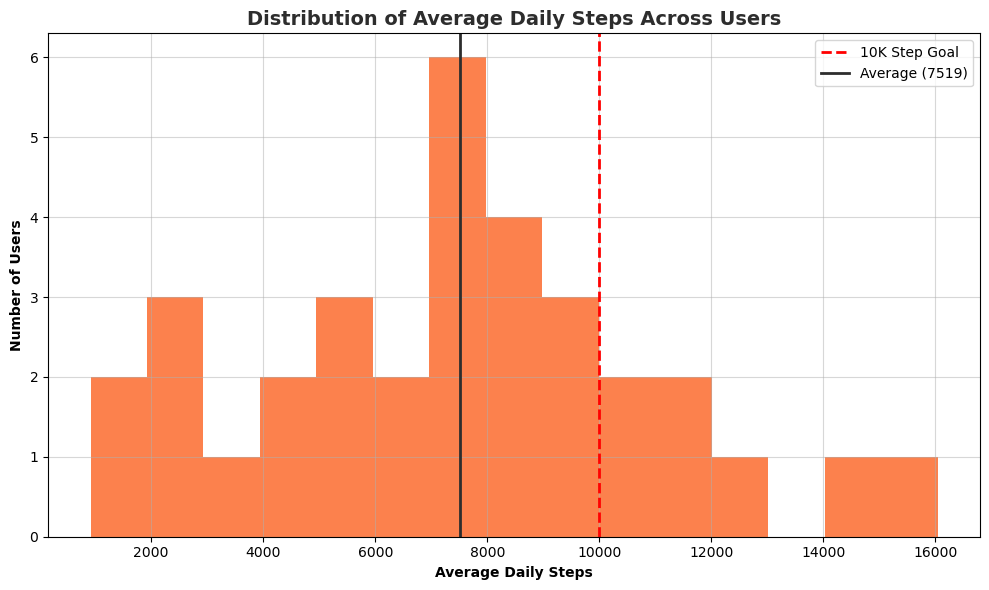

In [75]:
# Visualization 1: User Activity Distribution
plt.figure(figsize=(10, 6))

plt.hist(user_activity['avg_daily_steps'], bins=15, color=strava_orange, alpha=0.7)
plt.axvline(10000, color='red', linestyle='--', linewidth=2, label='10K Step Goal')
plt.axvline(user_activity['avg_daily_steps'].mean(), color=strava_dark, linestyle='-', linewidth=2, label=f'Average ({user_activity["avg_daily_steps"].mean():.0f})')

plt.title('Distribution of Average Daily Steps Across Users', fontsize=14, fontweight='bold', color=strava_dark)
plt.xlabel('Average Daily Steps', fontweight='bold')
plt.ylabel('Number of Users', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [76]:
# Key Insights:
# 1. Most users cluster around 7,500-8,000 steps - below the 10K goal line
# 2. Only ~3 power users consistently exceed 10K steps - small but valuable segment  
# 3. Large intervention opportunity visible - majority need motivation to reach goals

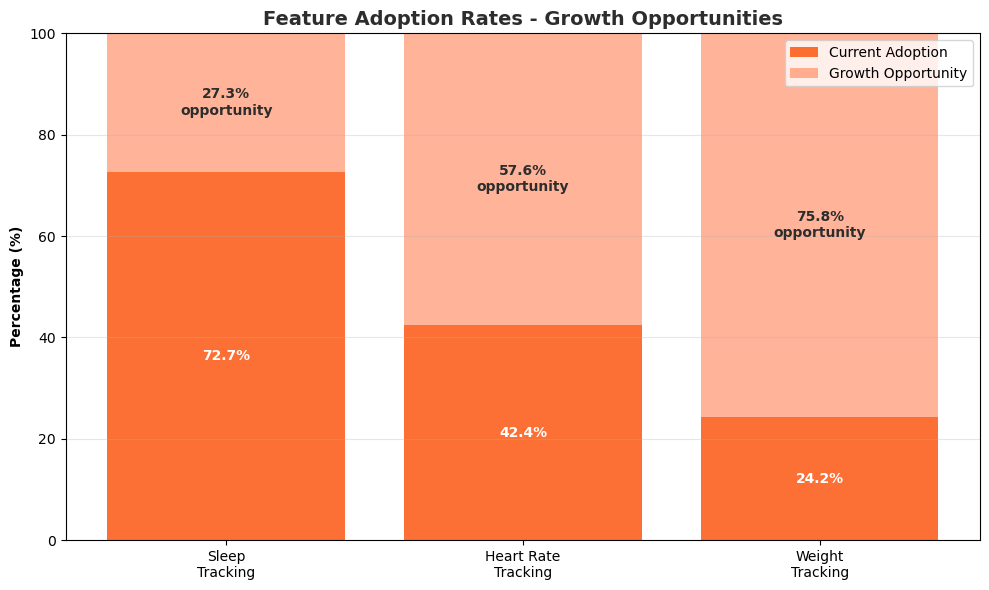

In [77]:
# Visualization 2: Feature Adoption Rates
plt.figure(figsize=(10, 6))

features = ['Sleep\nTracking', 'Heart Rate\nTracking', 'Weight\nTracking']
adoption_rates = [72.7, 42.4, 24.2]
gaps = [27.3, 57.6, 75.8]

# Create bars with Strava colors
bars = plt.bar(features, adoption_rates, color=strava_orange, alpha=0.8, label='Current Adoption')
gap_bars = plt.bar(features, gaps, bottom=adoption_rates, color=strava_light, alpha=0.5, label='Growth Opportunity')

plt.title('Feature Adoption Rates - Growth Opportunities', fontsize=14, fontweight='bold', color=strava_dark)
plt.ylabel('Percentage (%)', fontweight='bold')
plt.ylim(0, 100)

# Add percentage labels
for i, (adoption, gap) in enumerate(zip(adoption_rates, gaps)):
    plt.text(i, adoption/2, f'{adoption}%', ha='center', va='center', fontweight='bold', color='white')
    plt.text(i, adoption + gap/2, f'{gap}%\nopportunity', ha='center', va='center', fontweight='bold', color=strava_dark)

plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [78]:
# Key Insights:
# 1. Weight tracking has 75.8% untapped market - massive expansion opportunity
# 2. Sleep tracking leads adoption at 72.7% - strong foundation for wellness services  
# 3. Heart rate monitoring at 42.4% - mid-tier opportunity for premium partnerships

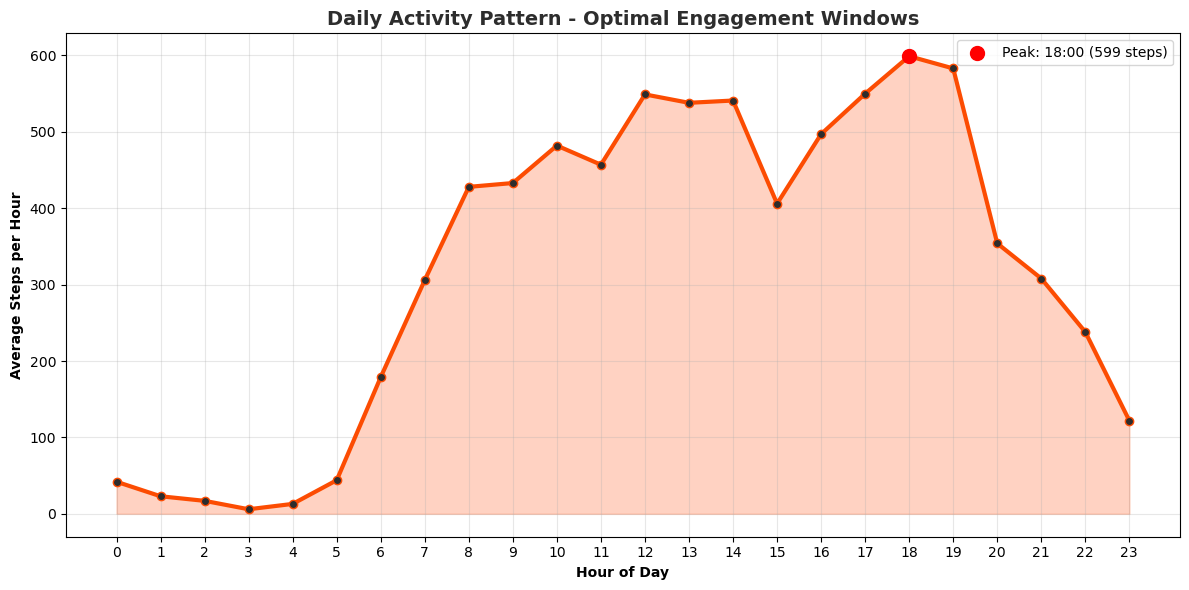

In [79]:
# Visualization 3: Hourly Activity Patterns
plt.figure(figsize=(12, 6))

# Create hourly activity data
hours = hourly_summary['hour']
avg_steps = hourly_summary['avg_steps_per_hour']

plt.plot(hours, avg_steps, color=strava_orange, linewidth=3, marker='o', markersize=6, markerfacecolor=strava_dark)
plt.fill_between(hours, avg_steps, alpha=0.3, color=strava_light)

# Highlight peak hours
peak_hour_idx = avg_steps.idxmax()
peak_hour = hours[peak_hour_idx]
peak_steps = avg_steps[peak_hour_idx]

plt.scatter(peak_hour, peak_steps, color='red', s=100, zorder=5, label=f'Peak: {peak_hour}:00 ({peak_steps:.0f} steps)')

plt.title('Daily Activity Pattern - Optimal Engagement Windows', fontsize=14, fontweight='bold', color=strava_dark)
plt.xlabel('Hour of Day', fontweight='bold')
plt.ylabel('Average Steps per Hour', fontweight='bold')
plt.xticks(range(0, 24, 1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
# Key Insights:
# 1. Clear evening peak at 6-7 PM (599 steps/hour) - optimal campaign timing
# 2. Secondary lunch break peak at 12-2 PM - workplace wellness opportunity  
# 3. Minimal activity 11 PM-6 AM - avoid notifications during sleep hours

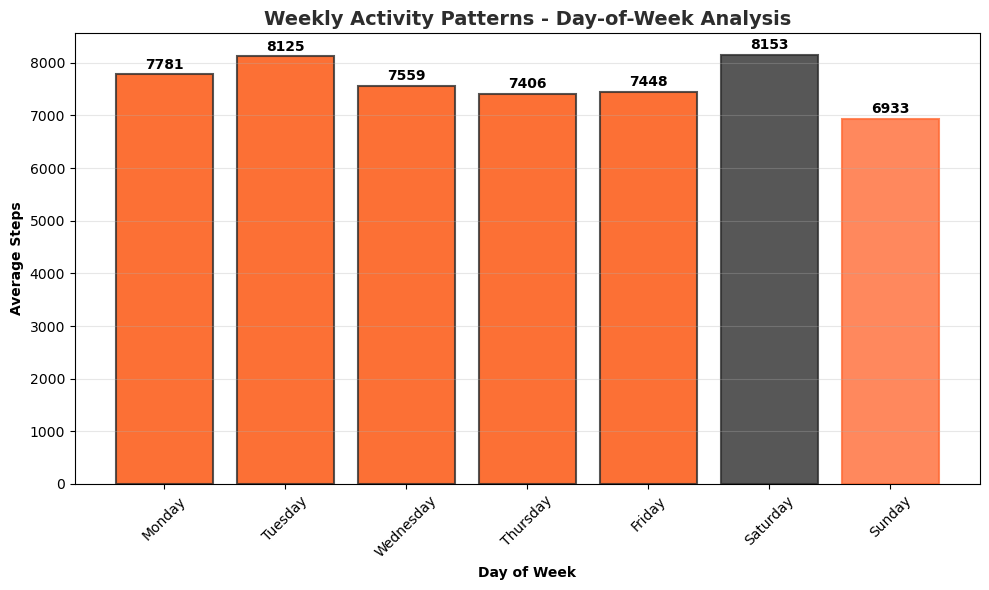

In [81]:
# Visualization 4: Weekly Activity Patterns
plt.figure(figsize=(10, 6))

days = weekly_pattern.index
steps = weekly_pattern['total_steps']

bars = plt.bar(days, steps, color=strava_orange, alpha=0.8, edgecolor=strava_dark, linewidth=1.5)

# Highlight highest and lowest days
max_steps = steps.max() 
min_steps = steps.min()

for i, (day, step_count) in enumerate(zip(days, steps)):
    if step_count == max_steps:
        bars[i].set_color(strava_dark)  # Highest in dark
    elif step_count == min_steps:
        bars[i].set_color(strava_light)  # Lowest in light

plt.title('Weekly Activity Patterns - Day-of-Week Analysis', fontsize=14, fontweight='bold', color=strava_dark)
plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Average Steps', fontweight='bold')
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(steps):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [82]:
# Key Insights:
# 1. Saturday highest activity (8,153 steps) - weekend leisure/outdoor activity peak
# 2. Sunday lowest activity (6,933 steps) - rest day pattern
# 3. Tuesday also strong (8,125 steps) - mid-week motivation maintains momentum

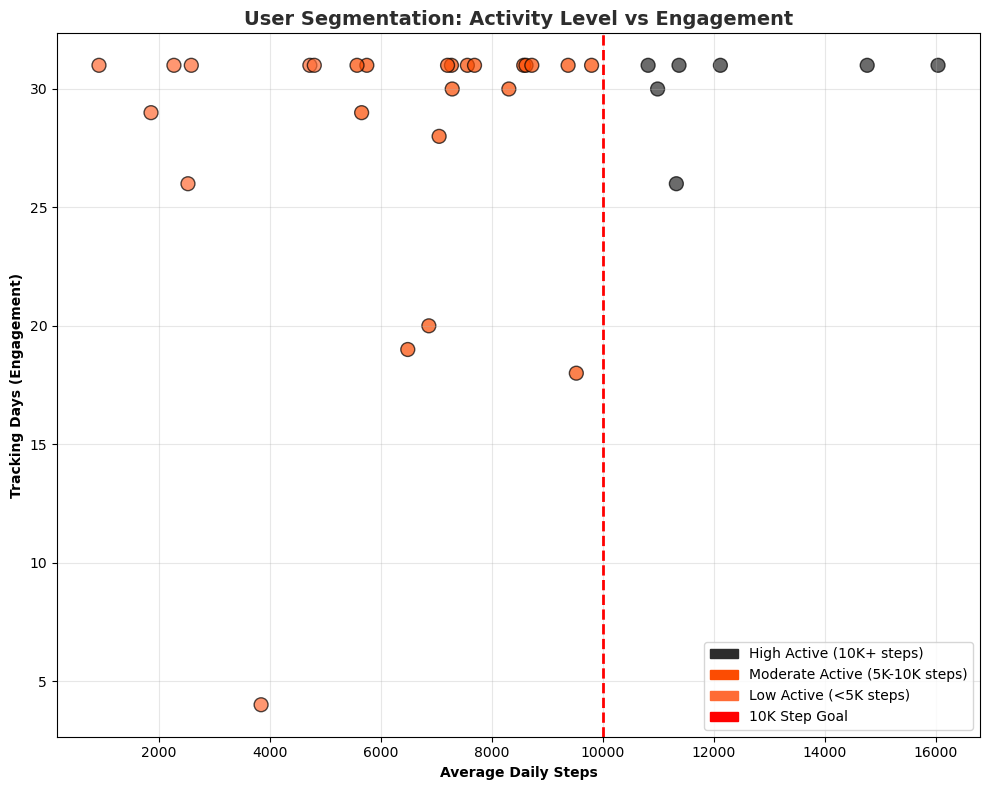

In [83]:
# Visualization 5: User Segmentation Analysis
plt.figure(figsize=(10, 8))

# Create color mapping for user types
color_map = {'High Active': strava_dark, 'Moderate Active': strava_orange, 'Low Active': strava_light}
colors = [color_map[user_type] for user_type in user_activity['user_type']]

# Create scatter plot
scatter = plt.scatter(user_activity['avg_daily_steps'], user_activity['tracking_days'], 
                     c=colors, s=100, alpha=0.7, edgecolors='black', linewidth=1)

# Add goal line
plt.axvline(x=10000, color='red', linestyle='--', linewidth=2, label='10K Step Goal')

plt.title('User Segmentation: Activity Level vs Engagement', fontsize=14, fontweight='bold', color=strava_dark)
plt.xlabel('Average Daily Steps', fontweight='bold')
plt.ylabel('Tracking Days (Engagement)', fontweight='bold')

# Create custom legend
import matplotlib.patches as mpatches
high_patch = mpatches.Patch(color=strava_dark, label='High Active (10K+ steps)')
moderate_patch = mpatches.Patch(color=strava_orange, label='Moderate Active (5K-10K steps)')
low_patch = mpatches.Patch(color=strava_light, label='Low Active (<5K steps)')
goal_line = mpatches.Patch(color='red', label='10K Step Goal')

plt.legend(handles=[high_patch, moderate_patch, low_patch, goal_line], loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [84]:
# Key Insights:
# 1. High Active users (7 users) show consistent 30+ day engagement
# 2. Moderate Active cluster dominates (18 users)
# 3. Strong correlation between step count and platform loyalty

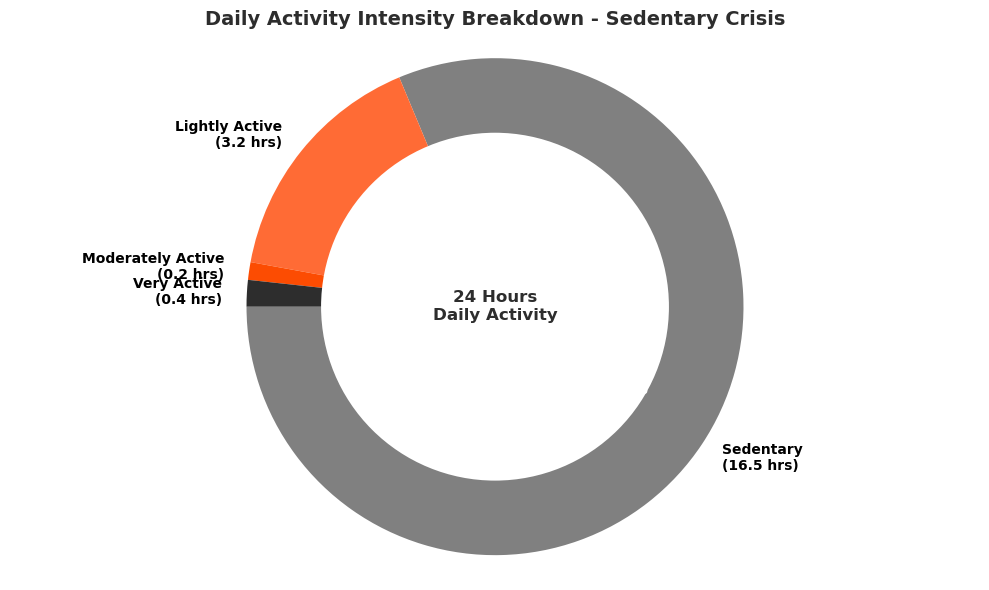

In [85]:
# Visualization 6: Activity Intensity Distribution
plt.figure(figsize=(10, 6))

# Activity intensity data
intensity_labels = ['Sedentary\n(16.5 hrs)', 'Lightly Active\n(3.2 hrs)', 'Moderately Active\n(0.2 hrs)', 'Very Active\n(0.4 hrs)']
intensity_minutes = [991, 193, 14, 21]
intensity_colors = [strava_gray, strava_light, strava_orange, strava_dark]

# Create pie chart with 180-degree rotation (startangle=270 instead of 90)
wedges, texts, autotexts = plt.pie(intensity_minutes, labels=intensity_labels, colors=intensity_colors, 
                                  autopct='%1.1f%%', startangle=180, textprops={'fontweight': 'bold'})

# Make percentage text white for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.title('Daily Activity Intensity Breakdown - Sedentary Crisis', fontsize=14, fontweight='bold', color=strava_dark)

# Add center circle for donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add central text
plt.text(0, 0, '24 Hours\nDaily Activity', ha='center', va='center', fontsize=12, fontweight='bold', color=strava_dark)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [86]:
# Key Insights:
# 1. Sedentary time dominates at 81.0% (16.5 hours) - massive health intervention opportunity
# 2. Very active time only 1.7% (21 minutes) - huge potential for fitness coaching programs
# 3. Light activity at 15.8% provides foundation - easiest segment to convert to moderate intensity

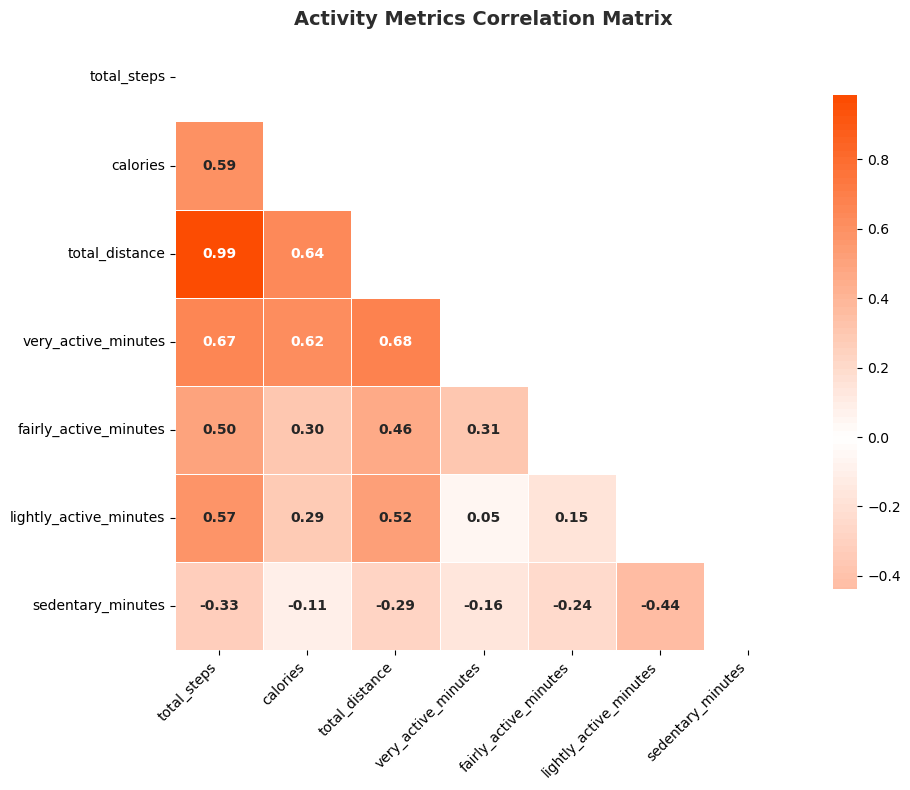

In [87]:
# Visualization 7: Activity Metrics Correlation Matrix
plt.figure(figsize=(10, 8))

# Select key metrics for correlation
correlation_metrics = ['total_steps', 'calories', 'total_distance', 'very_active_minutes', 
                      'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']

corr_matrix = daily_activity[correlation_metrics].corr()

# Create custom colormap with Strava colors
from matplotlib.colors import LinearSegmentedColormap
colors = ['#FF6B35', '#FFFFFF', '#FC4C02']  # Light orange -> White -> Strava orange
n_bins = 100
cmap = LinearSegmentedColormap.from_list('strava', colors, N=n_bins)

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'fontweight': 'bold'})

plt.title('Activity Metrics Correlation Matrix', fontsize=14, fontweight='bold', color=strava_dark)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [88]:
# Key Insights:
# 1. Steps and distance perfectly correlated (0.99) - distance automatically calculated from steps
# 2. Very active minutes best predictor of calories (0.62) - intensity drives burn rate
# 3. Sedentary time weakly negative correlation (-0.33) - opportunity for break reminders